# Classifying Text (Unsupervised Learning)


## get the data (corpus)
This should look familiar.

In [1]:
import urllib3 as ul3
from bs4 import BeautifulSoup as bs
import certifi

http = ul3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())

In [2]:
url = 'https://developer.paciellogroup.com/blog/'

In [21]:
def get_article_text(article_url):
    req = http.request('GET',article_url)
    page = req.data.decode('utf-8','ignore')
    soup = bs(page,'lxml')
    article = soup.article.text.replace('\n',' ')
    article = article.replace('\xa0',' ')
    return article
    

In [22]:
links = []
def fetch_links(url):
    req = http.request('GET',url)
    page = req.data.decode('utf-8','ignore')
    soup = bs(page,'lxml')
    all_h2 = soup.findAll('h2')
    for h in all_h2:
        try:
            a = h.a['href']
            links.append(a)
        except:
            a = ""
    for c in soup.findAll('span'):
        try:
            n = c['class']
            if n == ['next']:
                fetch_links(c.a['href'])
        except:
            n = ""
    return set(links)
    
links = fetch_links(url)

In [23]:
len(links)

343

In [25]:
def get_corpus(ls):
    corp = []
    for a in ls:
         corp.append(get_article_text(a))
    return corp

In [26]:
data_corpus = get_corpus(links)

In [28]:
len(data_corpus)

343

## TF-IDF analysis to get our features

In [29]:
# starting the TF-IFD analysis
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer(max_df=0.5,min_df=2,stop_words='english')

In [31]:
X = vectorizer.fit_transform(data_corpus)

In [32]:
X

<343x5436 sparse matrix of type '<class 'numpy.float64'>'
	with 55333 stored elements in Compressed Sparse Row format>

X is a 2 dimensional matrix. 

We can see the the 2804 number in the output represents each article from ```doxyPosts```. The following number is the number of distinct words in the entire set of articles. You can imagine in the matrix you have an axis for the articles and and axis for the words. The matrix shows what words appear in each article.

In [33]:
print(X)

  (0, 3289)	0.056570928559134384
  (0, 2696)	0.2512423850484711
  (0, 4050)	0.19490674500350028
  (0, 4298)	0.042017656128897685
  (0, 85)	0.03657536654686234
  (0, 2730)	0.0301575488166715
  (0, 67)	0.03248445750058338
  (0, 1432)	0.018340406564432258
  (0, 4336)	0.07059647567190462
  (0, 3963)	0.041960294996764215
  (0, 1916)	0.042993184277053176
  (0, 3993)	0.0301575488166715
  (0, 826)	0.03282118383823733
  (0, 5312)	0.042346098693489584
  (0, 4783)	0.06083676333073742
  (0, 378)	0.27711906265467606
  (0, 448)	0.01751684589965191
  (0, 2799)	0.15922827845040918
  (0, 4251)	0.05213327954078509
  (0, 2370)	0.019900211793931803
  (0, 1654)	0.1347110565112542
  (0, 3015)	0.03514809252214921
  (0, 2832)	0.061373551860842764
  (0, 1078)	0.048435473859088515
  (0, 3560)	0.03697016132241051
  :	:
  (342, 4476)	0.1302180444870689
  (342, 5142)	0.08376104411755181
  (342, 1939)	0.11685767896375586
  (342, 561)	0.0884573402013732
  (342, 35)	0.08951858938144529
  (342, 3977)	0.120537899344523

In [34]:
print(X[0])

  (0, 3289)	0.056570928559134384
  (0, 2696)	0.2512423850484711
  (0, 4050)	0.19490674500350028
  (0, 4298)	0.042017656128897685
  (0, 85)	0.03657536654686234
  (0, 2730)	0.0301575488166715
  (0, 67)	0.03248445750058338
  (0, 1432)	0.018340406564432258
  (0, 4336)	0.07059647567190462
  (0, 3963)	0.041960294996764215
  (0, 1916)	0.042993184277053176
  (0, 3993)	0.0301575488166715
  (0, 826)	0.03282118383823733
  (0, 5312)	0.042346098693489584
  (0, 4783)	0.06083676333073742
  (0, 378)	0.27711906265467606
  (0, 448)	0.01751684589965191
  (0, 2799)	0.15922827845040918
  (0, 4251)	0.05213327954078509
  (0, 2370)	0.019900211793931803
  (0, 1654)	0.1347110565112542
  (0, 3015)	0.03514809252214921
  (0, 2832)	0.061373551860842764
  (0, 1078)	0.048435473859088515
  (0, 3560)	0.03697016132241051
  :	:
  (0, 1268)	0.15560910092309688
  (0, 3235)	0.09349473397135638
  (0, 2755)	0.09462616870511384
  (0, 1541)	0.03958843752209658
  (0, 4643)	0.02157134532837677
  (0, 1540)	0.030963183137395784
  (

In [35]:
print (X[4])

  (0, 1432)	0.061704944501880854
  (0, 2370)	0.26781117637852075
  (0, 1654)	0.06474648699552574
  (0, 2368)	0.1598744033495805
  (0, 294)	0.10234040046520143
  (0, 4586)	0.15317696191784394
  (0, 3871)	0.0565940476354205
  (0, 4901)	0.11786827083562855
  (0, 3967)	0.06695279409463019
  (0, 4643)	0.07257519955417625
  (0, 4230)	0.09315708027703415
  (0, 4148)	0.08305666869421867
  (0, 2561)	0.16611333738843734
  (0, 3201)	0.11541929568032777
  (0, 4147)	0.09896943185474562
  (0, 1728)	0.09122959543872665
  (0, 2677)	0.08607364409915999
  (0, 2078)	0.07777911251501345
  (0, 2480)	0.07818632180193767
  (0, 3280)	0.08503517904247954
  (0, 549)	0.05937915822721165
  (0, 540)	0.09741155389965016
  (0, 4192)	0.09382702151381059
  (0, 4576)	0.12137087013497204
  (0, 348)	0.27750373235834674
  :	:
  (0, 2694)	0.17887034078551764
  (0, 5346)	0.1267241889786688
  (0, 5287)	0.07326747397403012
  (0, 2820)	0.16295757762499066
  (0, 778)	0.17887034078551764
  (0, 2719)	0.17887034078551764
  (0, 108

In [36]:
import matplotlib.pyplot as plt

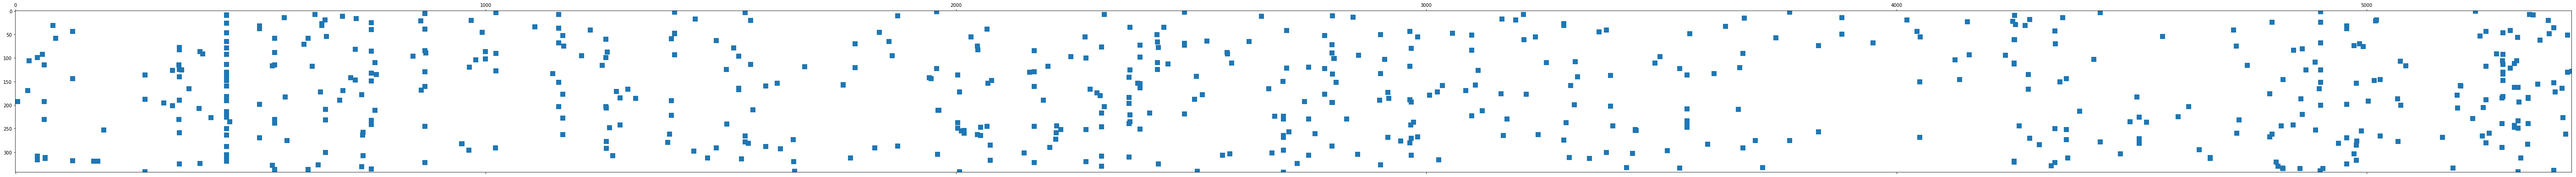

In [41]:
plt.figure(figsize=(100,150))
plt.spy(X,precision=.3,markersize=10)

In [42]:
print (X[0])

  (0, 3289)	0.056570928559134384
  (0, 2696)	0.2512423850484711
  (0, 4050)	0.19490674500350028
  (0, 4298)	0.042017656128897685
  (0, 85)	0.03657536654686234
  (0, 2730)	0.0301575488166715
  (0, 67)	0.03248445750058338
  (0, 1432)	0.018340406564432258
  (0, 4336)	0.07059647567190462
  (0, 3963)	0.041960294996764215
  (0, 1916)	0.042993184277053176
  (0, 3993)	0.0301575488166715
  (0, 826)	0.03282118383823733
  (0, 5312)	0.042346098693489584
  (0, 4783)	0.06083676333073742
  (0, 378)	0.27711906265467606
  (0, 448)	0.01751684589965191
  (0, 2799)	0.15922827845040918
  (0, 4251)	0.05213327954078509
  (0, 2370)	0.019900211793931803
  (0, 1654)	0.1347110565112542
  (0, 3015)	0.03514809252214921
  (0, 2832)	0.061373551860842764
  (0, 1078)	0.048435473859088515
  (0, 3560)	0.03697016132241051
  :	:
  (0, 1268)	0.15560910092309688
  (0, 3235)	0.09349473397135638
  (0, 2755)	0.09462616870511384
  (0, 1541)	0.03958843752209658
  (0, 4643)	0.02157134532837677
  (0, 1540)	0.030963183137395784
  (

## K-means clustering analysis of our features

In [43]:
from sklearn.cluster import KMeans
import numpy as np

In [44]:
km = KMeans(n_clusters = 3,init = 'k-means++', max_iter = 100, n_init = 1, verbose = True)

In [45]:
km.fit(X)

Initialization complete
Iteration  0, inertia 613.686
Iteration  1, inertia 317.032
Iteration  2, inertia 314.719
Iteration  3, inertia 314.129
Iteration  4, inertia 313.990
Iteration  5, inertia 313.862
Iteration  6, inertia 313.823
Iteration  7, inertia 313.792
Converged at iteration 7: center shift 0.000000e+00 within tolerance 1.746336e-08


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)

In [46]:
# This will show us the three groups or clusters and the number of articles in each article
np.unique(km.labels_,return_counts = True)

(array([0, 1, 2], dtype=int32), array([122,  79, 142]))

In [49]:
text = {}
for i, cluster in enumerate(km.labels_):
    oneDoc = data_corpus[i]
    if cluster not in text.keys():
        text[cluster] = oneDoc
    else:
        text[cluster] += oneDoc

text

{0: ' Shortish note on JAWS support for regions  Posted on Saturday, 28 July 2018 by Steve Faulkner  Category: Development   The JAWS screen reader has fairly recently changed the way it supports the announcement of ARIA landmark roles and HTML5 elements that map to landmark roles. This has lead to some confusion for people when testing the support for these features. Tester expectations and implementation realities There are defined requirements that browsers follow for interoperable implementations of features in the accessibility layer.  HTML Accessibility API Mappings 1.0 Core Accessibility API Mappings 1.1 Accessible Name and Description Computation 1.1 SVG Accessibility API Mappings  These specifications define, for example, what is to be exposed in the browser accessibility tree for a button element. What the specifications do not say is how this is to be presented to the user in an aural UI. There is a general expectation that this information will be conveyed to users, but in 

In [50]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import defaultdict
from string import punctuation
from heapq import nlargest
import nltk

In [51]:
# add stop words we know might be in the articles but are not relevant
_stopwords = set(stopwords.words('english') + list(punctuation) + ['million','billion','year','y/y',"\'s","''","'"])

In [52]:
keywords = {}
counts = {}

In [53]:
keywords = {}
counts = {}
str_text = []
for cluster in range(3):
    str_text.append(text[cluster])
    word_sent = word_tokenize(str_text[cluster].lower())
    word_sent = [word for word in word_sent if word not in _stopwords]
    freq = FreqDist(word_sent)
    keywords[cluster] = nlargest(100,freq, key=freq.get)
    counts[cluster] = freq

In [54]:
unique_keys = {}
for cluster in range(3):
    other_clusters=list(set(range(3))-set([cluster]))
    key_other_clusters = set(keywords[other_clusters[0]]).union(set(keywords[other_clusters[1]]))
    unique = set(keywords[cluster])-key_other_clusters
    unique_keys[cluster]=nlargest(10,unique,key=counts[cluster].get)

In [55]:
print (unique_keys)

{0: ['canvas', 'alt', 'title', 'images', 'case', 'image', 'readers', 'features', 'css', '2014'], 1: ['roles', 'slider', 'wai-aria', 'landmark', 'dialog', 'role=', 'value', 'state', 'mode', 'attributes'], 2: ['design', 'standards', 'disabilities', 'experience', 'digital', 'wcag', 'time', 'tpg', 'us', 'pdf']}


In [57]:
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 100,
 'n_clusters': 3,
 'n_init': 1,
 'n_jobs': 1,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': True}

## Making our classifier based on our model

In [58]:
# getting a new article. I just copied and pasted this from a new article on the doxy blog
article_web = 'https://axesslab.com/accessible-comics/'
req = http.request('GET',article_web)
page = req.data.decode()
soup = bs(page,'lxml')

In [59]:
test_article = soup.main.text
test_article

' Accessible ComicsPublished 7 August 2018, by Hampus SethforsA lot of the accessibility initiatives today are focused on web sites and apps. But there’s of course more to the digital world than that. In this article we’ll look at a case where a team has done great work to make their digital comic accessible to people with visual impairments.Let’s start with a small experiment!Imagine a blind person.What image pops up in your head?Is it a young person? Is the person at their work? Doing sports? At the cinema? Buying an Apple Watch? Reading a comic? Probably not.There are many preconceived ideas out there about what people with disabilities do, or rather don’t do. If you don’t have a visual impairment yourself or some blind friends, you probably don’t think of blind people in the above situations. Most people tend to think of an old person with a cane, not doing much. Which of course is a problem that for instance affects how people are treated, job recruitment and which products are ma

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
#default n_neighbors is 5
classifier.fit(X,km.labels_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [66]:
# we need to transform the article into th TF-IDF form
test_class = vectorizer.transform([article_web.encode('ascii',errors='ignore')])

In [67]:
test_class

<1x5436 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [68]:
classifier.predict(test_class)

array([0], dtype=int32)

## Try visualizing our data

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs

In [70]:
X_new = km.transform(X)

X_new

array([[0.9444382 , 0.96991646, 0.99279327],
       [0.96516484, 1.01969156, 0.99387983],
       [0.99755954, 1.03840042, 0.93757501],
       ...,
       [0.95770467, 1.0077589 , 0.99621815],
       [1.02722681, 1.06299626, 0.98844355],
       [0.97994385, 1.02116402, 0.99886327]])

In [71]:
X_new[:,2]

array([0.99279327, 0.99387983, 0.93757501, 1.00311236, 0.9990602 ,
       0.99049198, 0.95025478, 0.99515213, 0.98275505, 0.98588209,
       0.98688294, 0.97900986, 1.0078665 , 0.94090035, 0.97942209,
       1.00183151, 0.97745212, 1.0043261 , 0.99492921, 0.97568693,
       0.99828213, 0.98716813, 0.99168407, 0.99271559, 0.98919749,
       0.99822285, 0.99608407, 0.9855925 , 0.99151175, 0.97669709,
       0.98415227, 0.99379498, 1.00305552, 0.96484291, 0.98690378,
       0.95310102, 0.98864414, 1.00502289, 1.00668041, 1.00747848,
       0.97810586, 0.99879609, 0.98131561, 0.9899074 , 1.0059577 ,
       0.95445544, 0.9877215 , 0.93952045, 0.94794438, 0.95590457,
       1.00395628, 1.02029745, 1.00990578, 0.96902273, 0.99837333,
       1.00987374, 0.95902419, 0.9521674 , 1.01949978, 0.99116846,
       0.98805093, 1.00872421, 0.93803142, 1.00582607, 1.00036246,
       0.99895473, 0.99835501, 0.98582003, 0.91874404, 0.979644  ,
       0.98143804, 0.99240581, 0.95502116, 0.98303144, 1.00217

In [72]:
centers = km.cluster_centers_

In [73]:
centers

array([[0.        , 0.00190584, 0.00362152, ..., 0.00011681, 0.        ,
        0.00069399],
       [0.        , 0.00046825, 0.00502414, ..., 0.        , 0.00015894,
        0.00668974],
       [0.00760089, 0.00183135, 0.        , ..., 0.00358216, 0.00042867,
        0.00100475]])

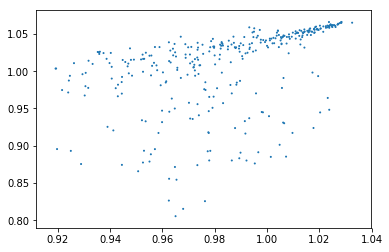

In [74]:
plt.scatter(X_new[:,0],X_new[:,1],X_new[:,2],cmap='viridis')

In [82]:
import pandas as pd
datafr = pd.DataFrame(X_new)
datafr

,0,1,2
0,0.944438,0.969916,0.992793
1,0.965165,1.019692,0.993880
2,0.997560,1.038400,0.937575
3,0.986493,0.970191,1.003112
4,0.953633,1.024782,0.999060
5,0.940576,1.005864,0.990492
6,0.982692,0.998040,0.950255
7,1.004169,1.054253,0.995152
8,0.989845,0.890681,0.982755
9,0.976246,0.825587,0.985882
